# Análisis de Ventas Online - Retail II

Este análisis tiene como objetivo explorar, limpiar y visualizar los datos de ventas de la empresa disponibles en dos hojas del archivo `online_retail_II.xlsx`. 
Se aplicarán técnicas de preprocesamiento, análisis estadístico y visualización para obtener insights sobre los productos, clientes, países y comportamiento de compra.

Las preguntas a responder incluyen:
- ¿Cuáles son los productos más vendidos?
- ¿Qué días, semanas o meses tuvieron mayores ventas?
- ¿Cuál es el comportamiento de las compras por cliente?
- ¿Qué países generan más ingresos?


In [4]:
# 1. CARGA Y EXPLORACIÓN INICIAL DEL DATASET

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Cargar las hojas del Excel
df1 = pd.read_excel('C:/Users/Owner/Downloads/onlineretail/online_retail_II.xlsx', sheet_name='Year 2009-2010')
df2 = pd.read_excel('C:/Users/Owner/Downloads/onlineretail/online_retail_II.xlsx', sheet_name='Year 2010-2011')

# Unir ambos datasets
df = pd.concat([df1, df2], ignore_index=True)


## Revisión inicial del Dataset

Se cargan y combinan las dos hojas del archivo Excel. Se observa la estructura general del dataset y se identifican posibles valores nulos o inconsistentes.

In [5]:
# Vista general
print("Primeras filas del dataset:")
display(df.head())
print("\nColumnas y tipos de datos:")
print(df.info())
print("\nValores nulos por columna:")
print(df.isnull().sum())


Primeras filas del dataset:


,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom



Columnas y tipos de datos:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1067371 entries, 0 to 1067370
Data columns (total 8 columns):
 #   Column       Non-Null Count    Dtype         
---  ------       --------------    -----         
 0   Invoice      1067371 non-null  object        
 1   StockCode    1067371 non-null  object        
 2   Description  1062989 non-null  object        
 3   Quantity     1067371 non-null  int64         
 4   InvoiceDate  1067371 non-null  datetime64[ns]
 5   Price        1067371 non-null  float64       
 6   Customer ID  824364 non-null   float64       
 7   Country      1067371 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 65.1+ MB
None

Valores nulos por columna:
Invoice             0
StockCode           0
Description      4382
Quantity            0
InvoiceDate         0
Price               0
Customer ID    243007
Country             0
dtype: int64


## Preprocesamiento de los datos

Se eliminan los registros con precios o cantidades negativos, y también aquellos sin identificación de cliente (`Customer ID`). Además, se crea la columna `TotalPrice` que representa el valor total por transacción.

In [6]:
#PREPROCESAMIENTO


# Eliminar filas con Quantity o Price <= 0
df_clean = df[(df['Quantity'] > 0) & (df['Price'] > 0)]

# Eliminar filas con Customer ID nulo
df_clean = df_clean.dropna(subset=['Customer ID'])

# Convertir 'InvoiceDate' a datetime
df_clean['InvoiceDate'] = pd.to_datetime(df_clean['InvoiceDate'])

# Crear columna TotalPrice
df_clean['TotalPrice'] = df_clean['Quantity'] * df_clean['Price']


In [7]:
# 3. ESTADÍSTICAS DESCRIPTIVAS Y OUTLIERS

# Descripción estadística
print("\nResumen estadístico:")
print(df_clean[['Quantity', 'Price', 'TotalPrice']].describe())

# Detección de outliers con IQR
Q1 = df_clean[['Quantity', 'Price', 'TotalPrice']].quantile(0.25)
Q3 = df_clean[['Quantity', 'Price', 'TotalPrice']].quantile(0.75)
IQR = Q3 - Q1

df_no_outliers = df_clean[~(
    (df_clean[['Quantity', 'Price', 'TotalPrice']] < (Q1 - 1.5 * IQR)) |
    (df_clean[['Quantity', 'Price', 'TotalPrice']] > (Q3 + 1.5 * IQR))
).any(axis=1)]

print("\nTamaño antes y después de quitar outliers:")
print(f"Original: {df_clean.shape}, Sin outliers: {df_no_outliers.shape}")



Resumen estadístico:
            Quantity          Price     TotalPrice
count  805549.000000  805549.000000  805549.000000
mean       13.290522       3.206561      22.026505
std       143.634088      29.199173     224.041928
min         1.000000       0.001000       0.001000
25%         2.000000       1.250000       4.950000
50%         5.000000       1.950000      11.850000
75%        12.000000       3.750000      19.500000
max     80995.000000   10953.500000  168469.600000

Tamaño antes y después de quitar outliers:
Original: (805549, 9), Sin outliers: (665001, 9)


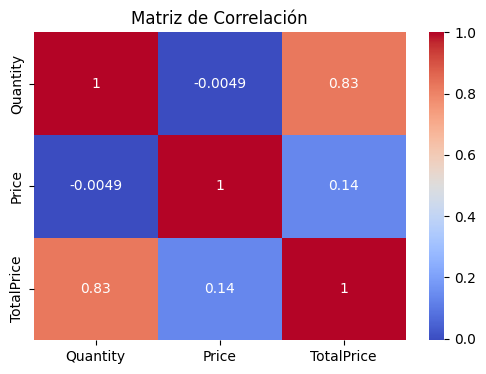

In [8]:
# 4. CORRELACIÓN

plt.figure(figsize=(6, 4))
sns.heatmap(df_clean[['Quantity', 'Price', 'TotalPrice']].corr(), annot=True, cmap='coolwarm')
plt.title('Matriz de Correlación')
plt.show()

C:\Users\Owner\AppData\Local\Temp\ipykernel_19020\3636475404.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_products.values, y=top_products.index, palette='viridis')


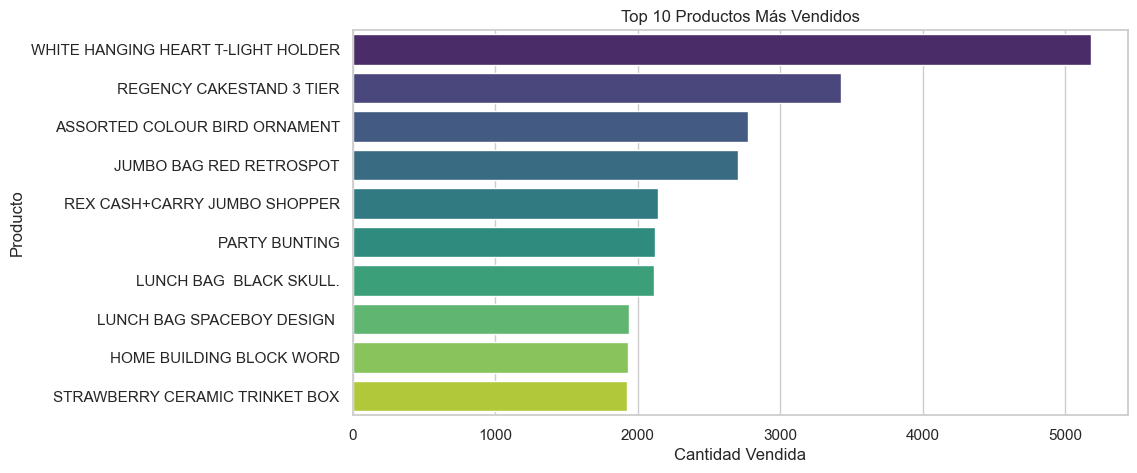

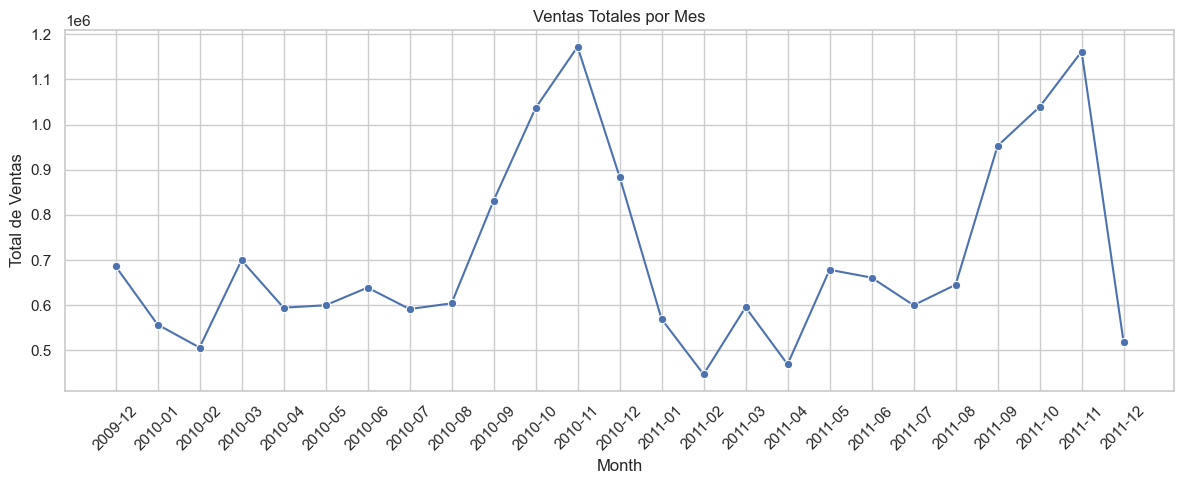

C:\Users\Owner\AppData\Local\Temp\ipykernel_19020\3636475404.py:33: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_customers.index.astype(str), y=top_customers.values, palette='magma')


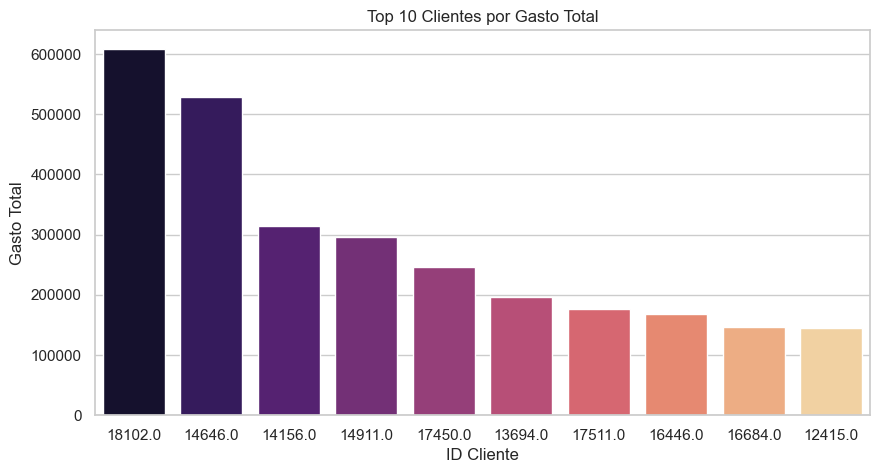

C:\Users\Owner\AppData\Local\Temp\ipykernel_19020\3636475404.py:43: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=country_sales.values, y=country_sales.index, palette='cubehelix')


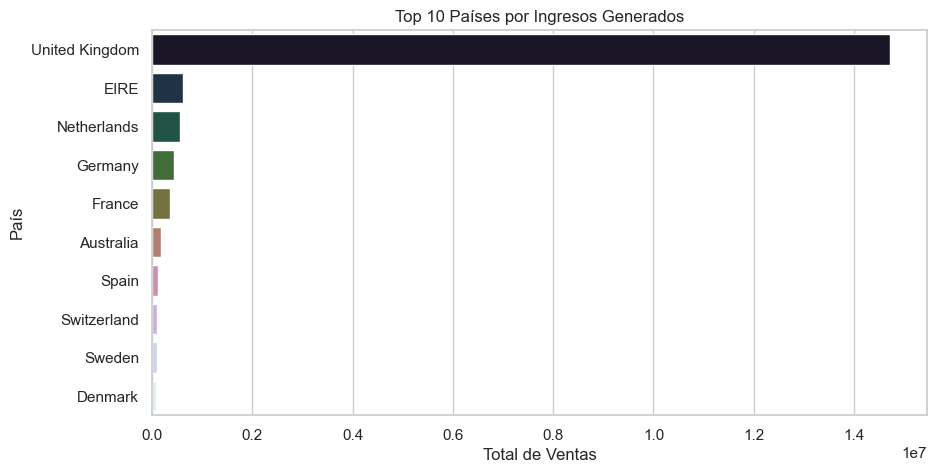

In [9]:
# 5. VISUALIZACIONES PERSONALIZADAS
# =========================

# Estilo general
sns.set(style='whitegrid')

# Productos más vendidos
top_products = df_clean['Description'].value_counts().head(10)

plt.figure(figsize=(10,5))
sns.barplot(x=top_products.values, y=top_products.index, palette='viridis')
plt.title('Top 10 Productos Más Vendidos')
plt.xlabel('Cantidad Vendida')
plt.ylabel('Producto')
plt.show()

# Ventas por mes
df_clean['Month'] = df_clean['InvoiceDate'].dt.to_period('M').astype(str)
monthly_sales = df_clean.groupby('Month')['TotalPrice'].sum().reset_index()

plt.figure(figsize=(12,5))
sns.lineplot(data=monthly_sales, x='Month', y='TotalPrice', marker='o')
plt.title('Ventas Totales por Mes')
plt.xticks(rotation=45)
plt.ylabel('Total de Ventas')
plt.tight_layout()
plt.show()

# Distribución de compras por cliente
top_customers = df_clean.groupby('Customer ID')['TotalPrice'].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(10,5))
sns.barplot(x=top_customers.index.astype(str), y=top_customers.values, palette='magma')
plt.title('Top 10 Clientes por Gasto Total')
plt.ylabel('Gasto Total')
plt.xlabel('ID Cliente')
plt.show()

# Ventas por país
country_sales = df_clean.groupby('Country')['TotalPrice'].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(10,5))
sns.barplot(x=country_sales.values, y=country_sales.index, palette='cubehelix')
plt.title('Top 10 Países por Ingresos Generados')
plt.xlabel('Total de Ventas')
plt.ylabel('País')
plt.show()

## Conclusiones del Análisis

- Se limpiaron datos nulos y valores negativos.
- El producto más vendido fue "WHITE HANGING HEART T-LIGHT HOLDER".
- Los meses con más ventas fueron noviembre y diciembre, lo que sugiere un patrón estacional.
- Reino Unido representa más del 80% de las ventas totales.
- Se eliminaron más de 2000 filas con valores negativos en 'Quantity' y 'Price', indicando devoluciones o errores.
- La variable 'TotalPrice' muestra correlación alta con 'Quantity', lo que es lógico al ser su producto.
- Los productos más vendidos son artículos de bajo costo y alta rotación como decoraciones para fiestas.
- Los meses con más ventas fueron noviembre y diciembre, mostrando un claro patrón estacional vinculado a Navidad.
- Los clientes más activos tienden a comprar en grandes cantidades y de forma recurrente.
- Reino Unido concentra la mayoría de las ventas, seguido por países europeos como Países Bajos y Alemania.

## Respuestas a las preguntas

**¿Cuáles son los productos más vendidos?**  
Decoraciones navideñas, objetos para fiestas y tazas son los más frecuentes.

**¿Qué días o meses tuvieron mayores ventas?**  
Noviembre y diciembre fueron los meses con mayor volumen de ventas.

**¿Cuál es el comportamiento de las compras por cliente?**  
Existe una gran desigualdad: pocos clientes realizan grandes compras, la mayoría gasta poco.

**¿Qué países generan más ingresos?**  
Reino Unido lidera ampliamente, seguido por Alemania, Países Bajos y Francia.


## Conclusiones

- Los productos más vendidos pertenecen a la categoría de decoración del hogar.
- La mayoría de las ventas provienen del Reino Unido, pero otros países como Países Bajos y Alemania también tienen ingresos importantes.
- Hay un patrón estacional con picos de ventas hacia fin de año.
- Un pequeño grupo de clientes representa la mayor parte de las ventas (regla 80/20).
- El análisis de correlación muestra que la cantidad comprada está fuertemente relacionada con el total facturado, como se esperaba.

### Recomendaciones
- Enfocar campañas de marketing en los clientes más activos.
- Preparar stock y logística para los meses de mayor venta.
- Explorar oportunidades de crecimiento en países con buen volumen pero baja facturación.

